In [2]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import cv2
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
%matplotlib inline
import xml.etree.ElementTree as ET
import pandas as pd 
import shutil 
import os 
import glob
from PIL import Image


In [3]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        # ymin = int(boxes.find("bndbox/ymin").text)
        # xmin = int(boxes.find("bndbox/xmin").text)
        # ymax = int(boxes.find("bndbox/ymax").text)
        # xmax = int(boxes.find("bndbox/xmax").text)

        ymin = int(float(boxes.find("bndbox/ymin").text))
        xmin = int(float(boxes.find("bndbox/xmin").text))
        ymax = int(float(boxes.find("bndbox/ymax").text))
        xmax = int(float(boxes.find("bndbox/xmax").text))

        list_with_single_boxes = [xmin, ymin, xmax, ymax, filename]
        list_with_all_boxes.append(list_with_single_boxes)

    return list_with_all_boxes


[[182, 65, 448, 308, '1_3.jpg']]


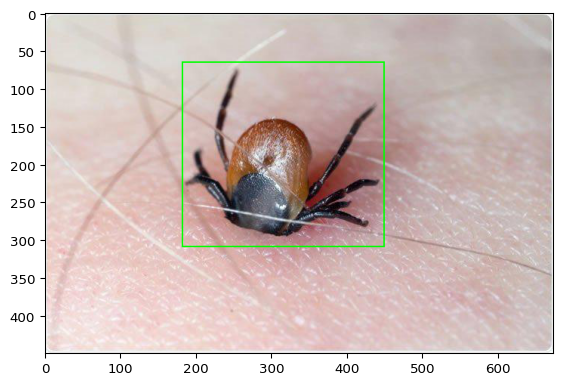

In [14]:
def plot_bbs(img_path:str, xml_path:str):
    image = imageio.imread(img_path)
    boxes = read_content(xml_path)

    print(boxes)

    # # new_boxes = []
    # # for list in boxes:
    # #     new_boxes.append(list)

    # num_of_lists = len(boxes)

    # bbs = BoundingBoxesOnImage([
    #     BoundingBox(x1=boxes[0][0], x2=boxes[0][2], y1=boxes[0][1], y2=boxes[0][3]),
    # ], shape=image.shape)

    boundbox1 = []

    bbs = BoundingBoxesOnImage(boundbox1, shape=image.shape)

    for list in boxes:
        boundbox1.append(BoundingBox(x1=list[0], x2=list[2], y1=list[1], y2=list[3])) 

    ia.imshow(bbs.draw_on_image(image, size=2))

plot_bbs('tick_test copy/1_3.jpg', 'tick_test copy/1_3.xml')



In [ ]:

for file in glob.iglob('tick_test copy/*'):

    if file.endswith('.jpg'):
        image = imageio.imread(file)
        new_file = file.removesuffix('.jpg')
        new_file = new_file+'.xml'
        boxes = read_content(new_file)
        is_xml = False
        
    elif file.endswith('.xml'):
        boxes = read_content(file)
        new_file = file.removesuffix('.xml')
        new_file = new_file+'.jpg'
        image = imageio.imread(new_file)
        is_xml = True 
        

    boundbox1 = []

    bbs = BoundingBoxesOnImage(boundbox1, shape=image.shape)

    for list in boxes:
        boundbox1.append(BoundingBox(x1=list[0], x2=list[2], y1=list[1], y2=list[3])) 

    ia.imshow(bbs.draw_on_image(image, size=2))